In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np 

In [5]:
img = image.load_img("/content/drive/MyDrive/Hackatho_CDAC/EMO_IMAGE/PXL_20220612_154438935.png")


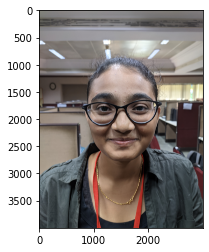

In [6]:
plt.imshow(img)

In [7]:
cv2.imread("/content/drive/MyDrive/Hackatho_CDAC/EMO_IMAGE/PXL_20220612_154438935.png")


array([[[150, 159, 162],
        [126, 135, 138],
        [128, 137, 140],
        ...,
        [122, 125, 130],
        [121, 126, 129],
        [121, 126, 129]],

       [[150, 159, 162],
        [127, 136, 139],
        [128, 137, 140],
        ...,
        [121, 125, 126],
        [121, 125, 126],
        [120, 125, 126]],

       [[150, 159, 162],
        [127, 136, 139],
        [128, 137, 140],
        ...,
        [123, 127, 122],
        [121, 126, 124],
        [121, 126, 125]],

       ...,

       [[ 98,  97,  93],
        [ 73,  72,  68],
        [ 74,  73,  69],
        ...,
        [ 39,  39,  33],
        [ 36,  40,  29],
        [ 37,  41,  29]],

       [[ 96,  97,  93],
        [ 71,  72,  68],
        [ 73,  72,  68],
        ...,
        [ 41,  42,  33],
        [ 37,  40,  31],
        [ 35,  41,  30]],

       [[ 96,  97,  93],
        [ 73,  74,  70],
        [ 76,  75,  71],
        ...,
        [ 39,  42,  33],
        [ 39,  42,  33],
        [ 36,  41,  32]]

In [8]:
train = ImageDataGenerator(rescale=1/243)
validation = ImageDataGenerator(rescale = 1/243)

In [9]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Hackatho_CDAC/EMO_IMAGE/train",
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Hackatho_CDAC/EMO_IMAGE/val",
                                               target_size = (200,200),
                                               batch_size = 3,
                                               class_mode = 'binary')


Found 17020 images belonging to 3 classes.
Found 2155 images belonging to 3 classes.


In [10]:
validation_dataset.class_indices

{'HAPPY': 0, 'NEUTRAL': 1, 'SAD': 2}

In [11]:
train_dataset.class_indices
#neural network cant take strings so it converts all the images into numbers or 0 or 1 


{'HAPPY': 0, 'NEUTRAL': 1, 'SAD': 2}

In [12]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')                                
                                    ])

In [14]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [15]:
model_fit = model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs = 10,
                    validation_data= validation_dataset)

Epoch 1/10
3/3 [==============================] - 314s 150s/step - loss: 29.6361 - accuracy: 0.3333 - val_loss: 3.3754 - val_accuracy: 0.4153
Epoch 2/10
3/3 [==============================] - 7s 3s/step - loss: 2.1186 - accuracy: 0.4444 - val_loss: 0.7165 - val_accuracy: 0.3281
Epoch 3/10
3/3 [==============================] - 7s 3s/step - loss: 1.6517 - accuracy: 0.1111 - val_loss: 0.6823 - val_accuracy: 0.2923
Epoch 4/10
3/3 [==============================] - 8s 3s/step - loss: 0.6879 - accuracy: 0.1111 - val_loss: 0.5429 - val_accuracy: 0.2812
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 0.6825 - accuracy: 0.3333 - val_loss: 0.4664 - val_accuracy: 0.2812
Epoch 6/10
3/3 [==============================] - 7s 3s/step - loss: -0.9643 - accuracy: 0.3333 - val_loss: 1.8285 - val_accuracy: 0.2817
Epoch 7/10
3/3 [==============================] - 7s 3s/step - loss: 2.3860 - accuracy: 0.2222 - val_loss: 2.5293 - val_accuracy: 0.2817
Epoch 8/10
3/3 [===================

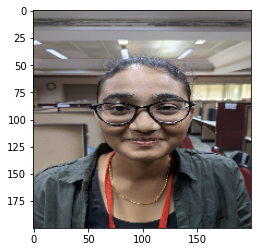

Not suffering from depression


In [16]:
dir_path = '/content/drive/MyDrive/Hackatho_CDAC/EMO_IMAGE/PXL_20220612_154438935.png'

img = image.load_img(dir_path,target_size=(200,200,3))
plt.imshow(img)
plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X,axis = 0)
images = np.vstack([X])
val = model.predict([images])
if val == 0:
  print("Depressed")
elif val ==1:
  print("Not suffering from depression")


In [17]:
model.save('/content/drive/MyDrive/Hackatho_CDAC/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Hackatho_CDAC/assets
